<a href="https://colab.research.google.com/github/IoannisGeorgiou1/homework-lesson-11/blob/main/diko_mou_sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!python -m spacy download el_core_news_sm

In [12]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime


# εάν έχουμε ελληνικά κείμενα
import spacy

In [13]:
# φτιάχνω κατευθείαν και το nlp για να το έχω έτοιμο για τα wordclouds μου και όποια ανάλυση κειμένου θέλω να κάνω
nlp = spacy.load('el_core_news_sm')

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [27]:
sdf = pd.read_csv('/content/drive/MyDrive/zougla.gr-MAY23.csv')

In [28]:
sdf

,site,url,date,section,title,author,text
0,zougla.gr,https://www.zougla.gr/kosmos/article/o-epikefa...,2023-05-01,kosmos,Ο επικεφαλής του ουκρανικού στρατού Βάλερι Ζαλ...,NaN,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...
1,zougla.gr,https://www.zougla.gr/kosmos/article/polemos-s...,2023-05-01,kosmos,Πόλεμος στην Ουκρανία: Η αντεπίθεση του Κιέβου...,NaN,Ο επικεφαλής της ρωσικής ιδιωτικής στρατιωτική...
2,zougla.gr,https://www.zougla.gr/greece/article/protomagi...,2023-05-01,greece,Πρωτομαγιά με βροχές και καταιγίδες,NaN,Γενικά νεφελώδης αναμένεται να είναι σήμερα Δε...
3,zougla.gr,https://www.zougla.gr/lifestyle/article/i-evi-...,2023-05-01,lifestyle,Η Εύη Σαλταφερίδου επέστρεψε στην Ελλάδα μετά ...,NaN,Η Εύη Σαλταφερίδου που αποχώρησε το βράδυ της ...
4,zougla.gr,https://www.zougla.gr/kosmos/article/polemos-s...,2023-05-01,kosmos,Πόλεμος στην Ουκρανία: Η αντιαεροπορική άμυνα ...,NaN,Συστοιχίες της ουκρανικής αντιαεροπορικής άμυν...
...,...,...,...,...,...,...,...
6846,zougla.gr,https://www.zougla.gr/kosmos/article/epta-sili...,2023-05-31,kosmos,Επτά συλλήψεις στη Γερμανία στο πλαίσιο έρευνα...,NaN,Οι γερμανικές αρχές συνέλαβαν επτά υπόπτους ως...
6847,zougla.gr,https://www.zougla.gr/sports/die8nis-idisis/re...,2023-05-31,sports,Ισπανία: Ο Μπενζεμά ανακοίνωσε στη Ρεάλ ότι θέ...,NaN,Πριν από μερικές εβδομάδες ο κόσμος του ποδοσφ...
6848,zougla.gr,https://www.zougla.gr/kosmos/article/i-rosia-a...,2023-05-31,kosmos,"Η Ρωσία ανακοίνωσε ότι κατέστρεψε το ""τελευταί...",NaN,Η Ρωσία ανακοίνωσε σήμερα ότι κατέστρεψε στην ...
6849,zougla.gr,https://www.zougla.gr/kosmos/article/prasino-f...,2023-05-31,kosmos,Πράσινο φως για πρώτο ορυχείο λιθίου στην Πορτ...,NaN,Η πορτογαλική υπηρεσία για την Προστασία του Π...


In [29]:
# διαγραφή των rows με τιμή nan σε οποιοδήποτε column
sdf.dropna(inplace=True)
# reset_index για να ξαναγίνει συνεχής η αρίθμηση του index του dataframe
sdf = df.reset_index(drop=True)

In [30]:
sdf

,site,url,date,section,title,author,text
0,zougla.gr,https://www.zougla.gr/kosmos/article/o-epikefa...,2023-05-01,kosmos,Ο επικεφαλής του ουκρανικού στρατού Βάλερι Ζαλ...,NaN,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...
1,zougla.gr,https://www.zougla.gr/kosmos/article/polemos-s...,2023-05-01,kosmos,Πόλεμος στην Ουκρανία: Η αντεπίθεση του Κιέβου...,NaN,Ο επικεφαλής της ρωσικής ιδιωτικής στρατιωτική...
2,zougla.gr,https://www.zougla.gr/greece/article/protomagi...,2023-05-01,greece,Πρωτομαγιά με βροχές και καταιγίδες,NaN,Γενικά νεφελώδης αναμένεται να είναι σήμερα Δε...
3,zougla.gr,https://www.zougla.gr/lifestyle/article/i-evi-...,2023-05-01,lifestyle,Η Εύη Σαλταφερίδου επέστρεψε στην Ελλάδα μετά ...,NaN,Η Εύη Σαλταφερίδου που αποχώρησε το βράδυ της ...
4,zougla.gr,https://www.zougla.gr/kosmos/article/polemos-s...,2023-05-01,kosmos,Πόλεμος στην Ουκρανία: Η αντιαεροπορική άμυνα ...,NaN,Συστοιχίες της ουκρανικής αντιαεροπορικής άμυν...
...,...,...,...,...,...,...,...
6846,zougla.gr,https://www.zougla.gr/kosmos/article/epta-sili...,2023-05-31,kosmos,Επτά συλλήψεις στη Γερμανία στο πλαίσιο έρευνα...,NaN,Οι γερμανικές αρχές συνέλαβαν επτά υπόπτους ως...
6847,zougla.gr,https://www.zougla.gr/sports/die8nis-idisis/re...,2023-05-31,sports,Ισπανία: Ο Μπενζεμά ανακοίνωσε στη Ρεάλ ότι θέ...,NaN,Πριν από μερικές εβδομάδες ο κόσμος του ποδοσφ...
6848,zougla.gr,https://www.zougla.gr/kosmos/article/i-rosia-a...,2023-05-31,kosmos,"Η Ρωσία ανακοίνωσε ότι κατέστρεψε το ""τελευταί...",NaN,Η Ρωσία ανακοίνωσε σήμερα ότι κατέστρεψε στην ...
6849,zougla.gr,https://www.zougla.gr/kosmos/article/prasino-f...,2023-05-31,kosmos,Πράσινο φως για πρώτο ορυχείο λιθίου στην Πορτ...,NaN,Η πορτογαλική υπηρεσία για την Προστασία του Π...


In [35]:
sdf.head()

,site,url,date,section,title,author,text
0,zougla.gr,https://www.zougla.gr/kosmos/article/o-epikefa...,2023-05-01,kosmos,Ο επικεφαλής του ουκρανικού στρατού Βάλερι Ζαλ...,NaN,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...
1,zougla.gr,https://www.zougla.gr/kosmos/article/polemos-s...,2023-05-01,kosmos,Πόλεμος στην Ουκρανία: Η αντεπίθεση του Κιέβου...,NaN,Ο επικεφαλής της ρωσικής ιδιωτικής στρατιωτική...
2,zougla.gr,https://www.zougla.gr/greece/article/protomagi...,2023-05-01,greece,Πρωτομαγιά με βροχές και καταιγίδες,NaN,Γενικά νεφελώδης αναμένεται να είναι σήμερα Δε...
3,zougla.gr,https://www.zougla.gr/lifestyle/article/i-evi-...,2023-05-01,lifestyle,Η Εύη Σαλταφερίδου επέστρεψε στην Ελλάδα μετά ...,NaN,Η Εύη Σαλταφερίδου που αποχώρησε το βράδυ της ...
4,zougla.gr,https://www.zougla.gr/kosmos/article/polemos-s...,2023-05-01,kosmos,Πόλεμος στην Ουκρανία: Η αντιαεροπορική άμυνα ...,NaN,Συστοιχίες της ουκρανικής αντιαεροπορικής άμυν...


In [36]:
sdf.tail()

,site,url,date,section,title,author,text
6846,zougla.gr,https://www.zougla.gr/kosmos/article/epta-sili...,2023-05-31,kosmos,Επτά συλλήψεις στη Γερμανία στο πλαίσιο έρευνα...,NaN,Οι γερμανικές αρχές συνέλαβαν επτά υπόπτους ως...
6847,zougla.gr,https://www.zougla.gr/sports/die8nis-idisis/re...,2023-05-31,sports,Ισπανία: Ο Μπενζεμά ανακοίνωσε στη Ρεάλ ότι θέ...,NaN,Πριν από μερικές εβδομάδες ο κόσμος του ποδοσφ...
6848,zougla.gr,https://www.zougla.gr/kosmos/article/i-rosia-a...,2023-05-31,kosmos,"Η Ρωσία ανακοίνωσε ότι κατέστρεψε το ""τελευταί...",NaN,Η Ρωσία ανακοίνωσε σήμερα ότι κατέστρεψε στην ...
6849,zougla.gr,https://www.zougla.gr/kosmos/article/prasino-f...,2023-05-31,kosmos,Πράσινο φως για πρώτο ορυχείο λιθίου στην Πορτ...,NaN,Η πορτογαλική υπηρεσία για την Προστασία του Π...
6850,zougla.gr,https://www.zougla.gr/kosmos/article/o-galos-p...,2023-05-31,kosmos,Ο Γάλλος πρόεδρος Μακρόν καταγγέλλει την ευθύν...,NaN,Οι αρχές του Κοσόβου φέρουν ευθύνη για την ανα...


In [37]:
sdf.shape

(6851, 7)

In [39]:
sdf.columns

Index(['site', 'url', 'date', 'section', 'title', 'author', 'text'], dtype='object')

In [40]:
sdf.describe()

,site,url,date,section,title,author,text
count,6851,6851,6851,6851,6851,34,6850
unique,1,6851,31,23,6775,12,6830
top,zougla.gr,https://www.zougla.gr/kosmos/article/o-epikefa...,2023-05-11,kosmos,Ο καιρός σήμερα,\t\t\t Κλεάνθης Γρίβας\t\t,Διαβάστε στο zougla.gr τα πρωτοσέλιδα και τα ο...
freq,6851,1,280,1540,19,8,4


In [47]:
df['datetime'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [48]:
sdf

,site,url,date,section,title,author,text
0,zougla.gr,https://www.zougla.gr/kosmos/article/o-epikefa...,2023-05-01,kosmos,Ο επικεφαλής του ουκρανικού στρατού Βάλερι Ζαλ...,NaN,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...
1,zougla.gr,https://www.zougla.gr/kosmos/article/polemos-s...,2023-05-01,kosmos,Πόλεμος στην Ουκρανία: Η αντεπίθεση του Κιέβου...,NaN,Ο επικεφαλής της ρωσικής ιδιωτικής στρατιωτική...
2,zougla.gr,https://www.zougla.gr/greece/article/protomagi...,2023-05-01,greece,Πρωτομαγιά με βροχές και καταιγίδες,NaN,Γενικά νεφελώδης αναμένεται να είναι σήμερα Δε...
3,zougla.gr,https://www.zougla.gr/lifestyle/article/i-evi-...,2023-05-01,lifestyle,Η Εύη Σαλταφερίδου επέστρεψε στην Ελλάδα μετά ...,NaN,Η Εύη Σαλταφερίδου που αποχώρησε το βράδυ της ...
4,zougla.gr,https://www.zougla.gr/kosmos/article/polemos-s...,2023-05-01,kosmos,Πόλεμος στην Ουκρανία: Η αντιαεροπορική άμυνα ...,NaN,Συστοιχίες της ουκρανικής αντιαεροπορικής άμυν...
...,...,...,...,...,...,...,...
6846,zougla.gr,https://www.zougla.gr/kosmos/article/epta-sili...,2023-05-31,kosmos,Επτά συλλήψεις στη Γερμανία στο πλαίσιο έρευνα...,NaN,Οι γερμανικές αρχές συνέλαβαν επτά υπόπτους ως...
6847,zougla.gr,https://www.zougla.gr/sports/die8nis-idisis/re...,2023-05-31,sports,Ισπανία: Ο Μπενζεμά ανακοίνωσε στη Ρεάλ ότι θέ...,NaN,Πριν από μερικές εβδομάδες ο κόσμος του ποδοσφ...
6848,zougla.gr,https://www.zougla.gr/kosmos/article/i-rosia-a...,2023-05-31,kosmos,"Η Ρωσία ανακοίνωσε ότι κατέστρεψε το ""τελευταί...",NaN,Η Ρωσία ανακοίνωσε σήμερα ότι κατέστρεψε στην ...
6849,zougla.gr,https://www.zougla.gr/kosmos/article/prasino-f...,2023-05-31,kosmos,Πράσινο φως για πρώτο ορυχείο λιθίου στην Πορτ...,NaN,Η πορτογαλική υπηρεσία για την Προστασία του Π...


In [49]:
df['year'] = pd.DatetimeIndex(df['datetime']).year
df['month'] = pd.DatetimeIndex(df['datetime']).month
df['day'] = pd.DatetimeIndex(df['datetime']).day


In [50]:
sdf

,site,url,date,section,title,author,text
0,zougla.gr,https://www.zougla.gr/kosmos/article/o-epikefa...,2023-05-01,kosmos,Ο επικεφαλής του ουκρανικού στρατού Βάλερι Ζαλ...,NaN,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...
1,zougla.gr,https://www.zougla.gr/kosmos/article/polemos-s...,2023-05-01,kosmos,Πόλεμος στην Ουκρανία: Η αντεπίθεση του Κιέβου...,NaN,Ο επικεφαλής της ρωσικής ιδιωτικής στρατιωτική...
2,zougla.gr,https://www.zougla.gr/greece/article/protomagi...,2023-05-01,greece,Πρωτομαγιά με βροχές και καταιγίδες,NaN,Γενικά νεφελώδης αναμένεται να είναι σήμερα Δε...
3,zougla.gr,https://www.zougla.gr/lifestyle/article/i-evi-...,2023-05-01,lifestyle,Η Εύη Σαλταφερίδου επέστρεψε στην Ελλάδα μετά ...,NaN,Η Εύη Σαλταφερίδου που αποχώρησε το βράδυ της ...
4,zougla.gr,https://www.zougla.gr/kosmos/article/polemos-s...,2023-05-01,kosmos,Πόλεμος στην Ουκρανία: Η αντιαεροπορική άμυνα ...,NaN,Συστοιχίες της ουκρανικής αντιαεροπορικής άμυν...
...,...,...,...,...,...,...,...
6846,zougla.gr,https://www.zougla.gr/kosmos/article/epta-sili...,2023-05-31,kosmos,Επτά συλλήψεις στη Γερμανία στο πλαίσιο έρευνα...,NaN,Οι γερμανικές αρχές συνέλαβαν επτά υπόπτους ως...
6847,zougla.gr,https://www.zougla.gr/sports/die8nis-idisis/re...,2023-05-31,sports,Ισπανία: Ο Μπενζεμά ανακοίνωσε στη Ρεάλ ότι θέ...,NaN,Πριν από μερικές εβδομάδες ο κόσμος του ποδοσφ...
6848,zougla.gr,https://www.zougla.gr/kosmos/article/i-rosia-a...,2023-05-31,kosmos,"Η Ρωσία ανακοίνωσε ότι κατέστρεψε το ""τελευταί...",NaN,Η Ρωσία ανακοίνωσε σήμερα ότι κατέστρεψε στην ...
6849,zougla.gr,https://www.zougla.gr/kosmos/article/prasino-f...,2023-05-31,kosmos,Πράσινο φως για πρώτο ορυχείο λιθίου στην Πορτ...,NaN,Η πορτογαλική υπηρεσία για την Προστασία του Π...


In [51]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [52]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
emolex_df.shape

(13171, 11)

In [54]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [55]:
emolex_df.shape

(13161, 11)

In [56]:
import spacy

In [57]:
nlp = spacy.load('el_core_news_sm')

In [58]:
sdf = pd.read_csv('/content/drive/MyDrive/zougla.gr-MAY23.csv')

In [59]:
len(sdf)

6851

In [60]:
sdf.head(1)

,site,url,date,section,title,author,text
0,zougla.gr,https://www.zougla.gr/kosmos/article/o-epikefa...,2023-05-01,kosmos,Ο επικεφαλής του ουκρανικού στρατού Βάλερι Ζαλ...,NaN,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...


In [64]:
short_sdf = sdf[['date','text' ]]

In [65]:
short_sdf

,date,text
0,2023-05-01,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...
1,2023-05-01,Ο επικεφαλής της ρωσικής ιδιωτικής στρατιωτική...
2,2023-05-01,Γενικά νεφελώδης αναμένεται να είναι σήμερα Δε...
3,2023-05-01,Η Εύη Σαλταφερίδου που αποχώρησε το βράδυ της ...
4,2023-05-01,Συστοιχίες της ουκρανικής αντιαεροπορικής άμυν...
...,...,...
6846,2023-05-31,Οι γερμανικές αρχές συνέλαβαν επτά υπόπτους ως...
6847,2023-05-31,Πριν από μερικές εβδομάδες ο κόσμος του ποδοσφ...
6848,2023-05-31,Η Ρωσία ανακοίνωσε σήμερα ότι κατέστρεψε στην ...
6849,2023-05-31,Η πορτογαλική υπηρεσία για την Προστασία του Π...


In [66]:
short_sdf.dtypes

date    object
text    object
dtype: object

In [67]:
short_sdf['date'] = pd.to_datetime(short_sdf['date'], format='%Y-%m-%d')

<ipython-input-67-82b9b996c14a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_sdf['date'] = pd.to_datetime(short_sdf['date'], format='%Y-%m-%d')


In [68]:
short_sdf.dtypes

date    datetime64[ns]
text            object
dtype: object

In [69]:
short_sdf['text'] = short_sdf['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ", regex=True)

<ipython-input-69-18874bccdfba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_sdf['text'] = short_sdf['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ", regex=True)


In [70]:
short_sdf.head()

,date,text
0,2023-05-01,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...
1,2023-05-01,Ο επικεφαλής της ρωσικής ιδιωτικής στρατιωτική...
2,2023-05-01,Γενικά νεφελώδης αναμένεται να είναι σήμερα Δε...
3,2023-05-01,Η Εύη Σαλταφερίδου που αποχώρησε το βράδυ της ...
4,2023-05-01,Συστοιχίες της ουκρανικής αντιαεροπορικής άμυν...


In [79]:

short_sdf = short_sdf.dropna(subset=['text'])


In [80]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [81]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [82]:
matrix = vec.fit_transform(short_sdf['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
wordcount_df # to kathe row antistixoi sto keimenoy tou kathe row apo thn efsyn 0-119 kai h panv sthlh h 13.000 einai oi lexeis toy lexikoy

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6846,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6847,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6848,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
wordcount_df.shape

(6850, 13161)

In [86]:
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
emolex_df[emolex_df.Anger == 1].tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13094,διεξοδος,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13096,ζωυφια,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13100,θυματοποιω,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
13128,αποτυχημενος,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [88]:
emolex_df[emolex_df.Positive == 1]['word']

0                       αφεση
8                        αμην
11                  αυγουστος
15             γαμηλιο ταξιδι
24       διευθυντρια σχολειου
                 ...         
13109        ζωτικης σημασιας
13132              αδιαβροχος
13137            καλωσορισατε
13145      απροσδοκητα ευρημα
13158                νεοτερος
Name: word, Length: 2352, dtype: object

In [89]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [90]:
sadness_words

27           δευτερα παρουσια
28                   δευτερον
36                   εξαρτηση
62                 κορσικανος
69               λυρικη σκηνη
                 ...         
13123                ελλειπων
13129                 σπαταλω
13144    ανεξελεγκτη πυρκαγια
13147                 αλιμονο
13148           επιδεινωνεται
Name: word, Length: 1328, dtype: object

In [91]:
wordcount_df.tail(1)

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
6849,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
wordcount_df[sadness_words].tail(1)

,δευτερα παρουσια,δευτερον,εξαρτηση,κορσικανος,λυρικη σκηνη,μουσικη,ματαιωση,μη εγκυρο,παλαιοτερα,προκαθορισμενο,...,ανευ σημασιας,βλαστικος,βεντεττα,θυματοποιω,ωχρος,ελλειπων,σπαταλω,ανεξελεγκτη πυρκαγια,αλιμονο,επιδεινωνεται
6849,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
wordcount_df[sadness_words].sum(axis=1)

0       2
1       2
2       0
3       0
4       0
       ..
6845    0
6846    5
6847    2
6848    4
6849    3
Length: 6850, dtype: int64

In [96]:
short_sdf.head(5)

,date,text
0,2023-05-01,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...
1,2023-05-01,Ο επικεφαλής της ρωσικής ιδιωτικής στρατιωτική...
2,2023-05-01,Γενικά νεφελώδης αναμένεται να είναι σήμερα Δε...
3,2023-05-01,Η Εύη Σαλταφερίδου που αποχώρησε το βράδυ της ...
4,2023-05-01,Συστοιχίες της ουκρανικής αντιαεροπορικής άμυν...


In [98]:
#Δημιουργούμε στήλες συναισθημάτων

short_sdf['anger'] = wordcount_df[angry_words].sum(axis=1)

short_sdf['positive'] = wordcount_df[positive_words].sum(axis=1)

short_sdf['joy'] = wordcount_df[joy_words].sum(axis=1)

short_sdf['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_sdf['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_sdf['trust'] = wordcount_df[trust_words].sum(axis=1)

short_sdf['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_sdf['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_sdf['negative'] = wordcount_df[negative_words].sum(axis=1)

short_sdf['fear'] = wordcount_df[fear_words].sum(axis=1)

<ipython-input-98-e8c5597c428a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_sdf['anger'] = wordcount_df[angry_words].sum(axis=1)
<ipython-input-98-e8c5597c428a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_sdf['positive'] = wordcount_df[positive_words].sum(axis=1)
<ipython-input-98-e8c5597c428a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [99]:
short_sdf

,date,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2023-05-01,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...,2.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,5.0,2.0
1,2023-05-01,Ο επικεφαλής της ρωσικής ιδιωτικής στρατιωτική...,3.0,1.0,1.0,2.0,2.0,0.0,3.0,2.0,8.0,4.0
2,2023-05-01,Γενικά νεφελώδης αναμένεται να είναι σήμερα Δε...,0.0,3.0,1.0,0.0,1.0,1.0,3.0,0.0,1.0,0.0
3,2023-05-01,Η Εύη Σαλταφερίδου που αποχώρησε το βράδυ της ...,0.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0
4,2023-05-01,Συστοιχίες της ουκρανικής αντιαεροπορικής άμυν...,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6846,2023-05-31,Οι γερμανικές αρχές συνέλαβαν επτά υπόπτους ως...,7.0,11.0,3.0,4.0,2.0,6.0,7.0,5.0,8.0,6.0
6847,2023-05-31,Πριν από μερικές εβδομάδες ο κόσμος του ποδοσφ...,2.0,5.0,2.0,1.0,2.0,6.0,7.0,2.0,1.0,2.0
6848,2023-05-31,Η Ρωσία ανακοίνωσε σήμερα ότι κατέστρεψε στην ...,2.0,7.0,1.0,3.0,1.0,5.0,5.0,4.0,8.0,4.0
6849,2023-05-31,Η πορτογαλική υπηρεσία για την Προστασία του Π...,1.0,11.0,5.0,2.0,2.0,8.0,3.0,3.0,5.0,3.0


In [101]:
#Κάνουμε index τη στήλη date
short_sdf.reset_index(inplace=True)
short_sdf.set_index('date', inplace=True)
short_sdf

,index,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
date,,,,,,,,,,,,
2023-05-01,0,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...,2.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,5.0,2.0
2023-05-01,1,Ο επικεφαλής της ρωσικής ιδιωτικής στρατιωτική...,3.0,1.0,1.0,2.0,2.0,0.0,3.0,2.0,8.0,4.0
2023-05-01,2,Γενικά νεφελώδης αναμένεται να είναι σήμερα Δε...,0.0,3.0,1.0,0.0,1.0,1.0,3.0,0.0,1.0,0.0
2023-05-01,3,Η Εύη Σαλταφερίδου που αποχώρησε το βράδυ της ...,0.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0
2023-05-01,4,Συστοιχίες της ουκρανικής αντιαεροπορικής άμυν...,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,6846,Οι γερμανικές αρχές συνέλαβαν επτά υπόπτους ως...,7.0,11.0,3.0,4.0,2.0,6.0,7.0,5.0,8.0,6.0
2023-05-31,6847,Πριν από μερικές εβδομάδες ο κόσμος του ποδοσφ...,2.0,5.0,2.0,1.0,2.0,6.0,7.0,2.0,1.0,2.0
2023-05-31,6848,Η Ρωσία ανακοίνωσε σήμερα ότι κατέστρεψε στην ...,2.0,7.0,1.0,3.0,1.0,5.0,5.0,4.0,8.0,4.0


<Axes: xlabel='date'>

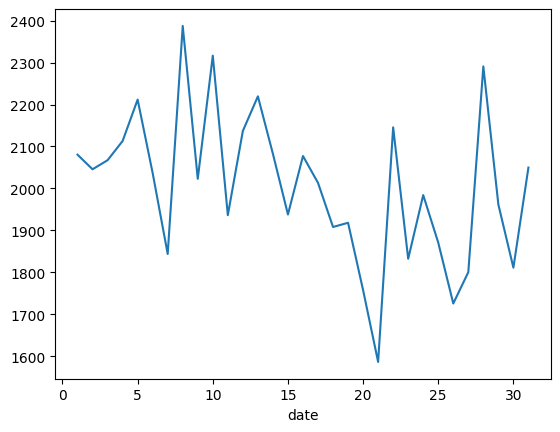

In [105]:
#Μετράμε τον μ.ο. του αριθμού των χαρακτηρων (των λεξεων) ανά ημέρα

#Με groupby
short_sdf['text'].str.len().groupby(by=short_sdf.index.day).mean().plot()


<Axes: ylabel='date'>

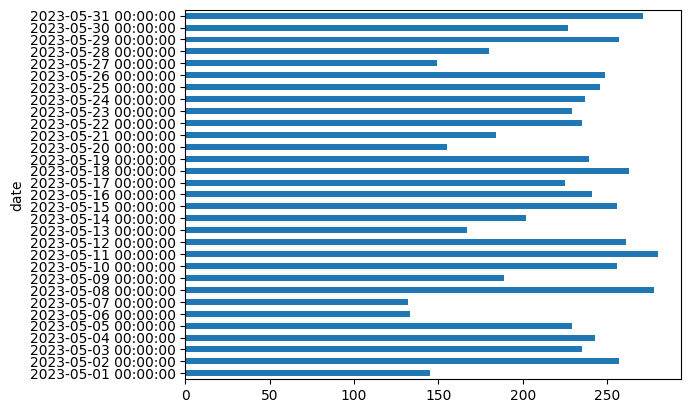

In [106]:
short_sdf['text'].resample('D').count().plot(kind='barh')
#Μετράμε το πλήθος των άρθρων ανά ημέρα

<Axes: xlabel='date'>

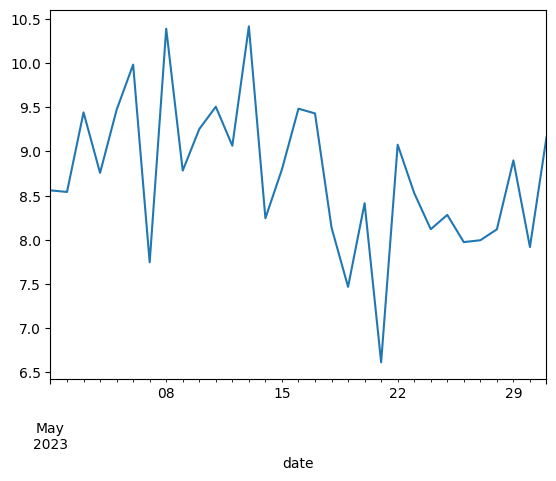

In [108]:
short_sdf['positive'].resample('D').mean().plot()
#Μετράμε τη θετικότητα/αρνητικότητα και το συναισθηματικό πρόσιμο των άρθρων ανά ημέρα

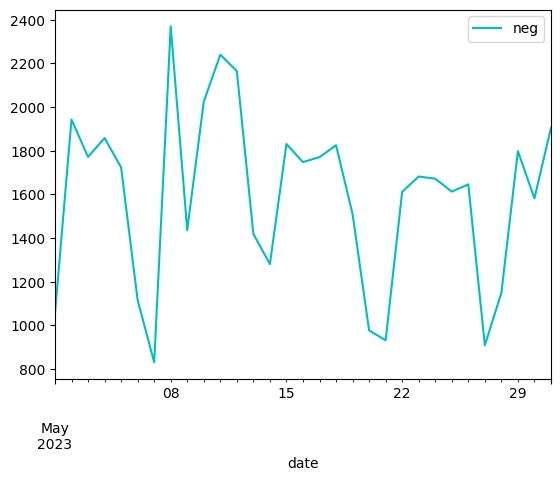

In [112]:
short_sdf['negative'].resample('D').sum().plot(color = 'c',label = 'neg').legend()

<Axes: xlabel='date'>

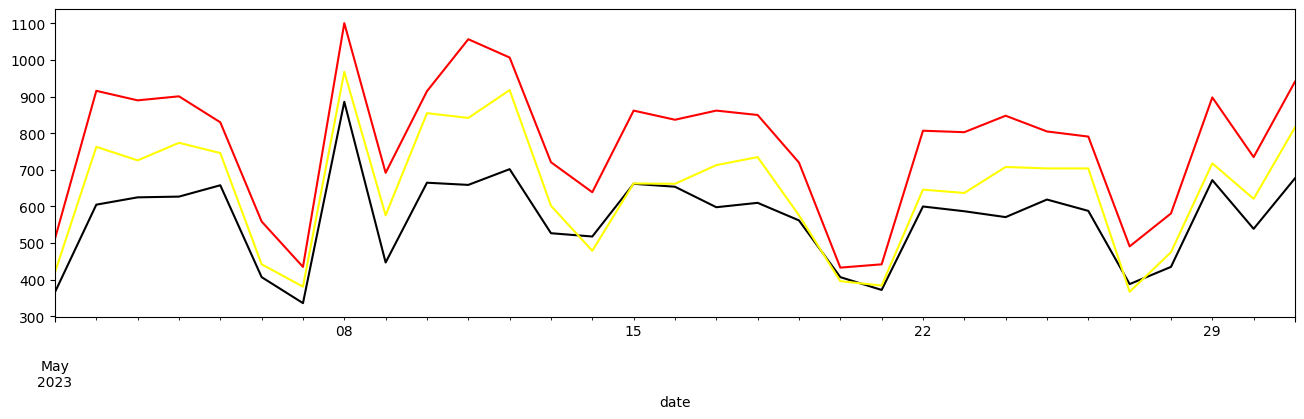

In [114]:
#Μπορούμε να εμφανίσουμε πολλά linecharts στο ίδιο γράφημα
ax = short_sdf['anger'].resample('D').sum().plot(figsize=(16,4), color = 'red')
short_sdf['joy'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'black')
short_sdf['sadness'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'yellow')

In [115]:
import matplotlib.pyplot as plt
plt.style.use('default')
#plt.style.use('classic')
#plt.style.use('ggplot')
plt.style.use('Solarize_Light2')
#plt.style.use('seaborn-v0_8-bright')

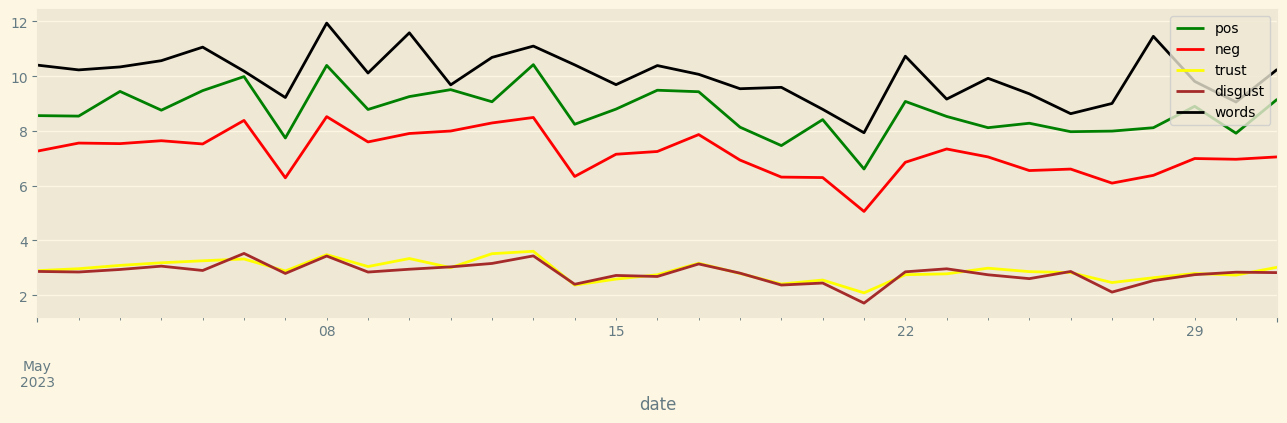

In [116]:
ax = short_sdf['positive'].resample('D').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_sdf['negative'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_sdf['sadness'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'yellow').legend()
short_sdf['disgust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_sdf['text'].str.len().resample('D').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()

<ipython-input-117-e8f238cf0bb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_sdf['pos/neg'] = short_sdf['positive'] - short_sdf['negative']


<Axes: xlabel='date'>

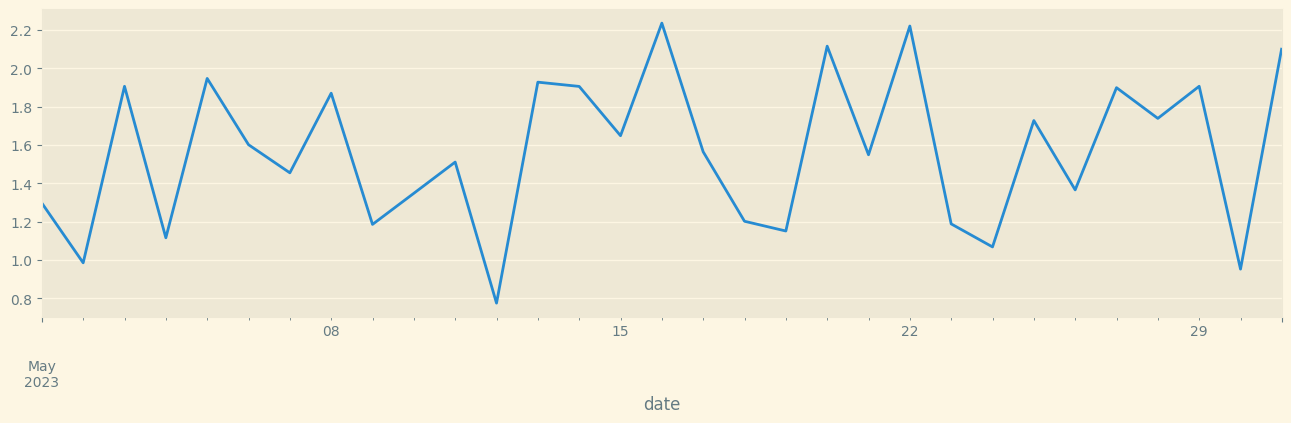

In [117]:
#φτιαχνω ενα γραφημα οπου  αφαιρω το θετικο απο το αρνητικο για να βρω την διαφορα τους και το εφανιζω σε γραφημα
short_sdf['pos/neg'] = short_sdf['positive'] - short_sdf['negative']
short_sdf['pos/neg'].resample('D').mean().plot(figsize=(16,4))

In [118]:
#plt.style.use('grayscale')
plt.style.use('seaborn-v0_8-darkgrid')
#εδω το μετατρεπω σε ποσοστο προσθετω το ποσιτιβε με το νεγατιωε και το πολλαπλασιαζω επι 100 και μετα το διαιρω σαν να κανω μεθοδο των τριων

<ipython-input-119-345056b24105>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_sdf['(-)αρνητικότητα | θετικότητα(+)'] = short_sdf.positive*100//short_sdf[['positive','negative']].sum(


<Axes: xlabel='date'>

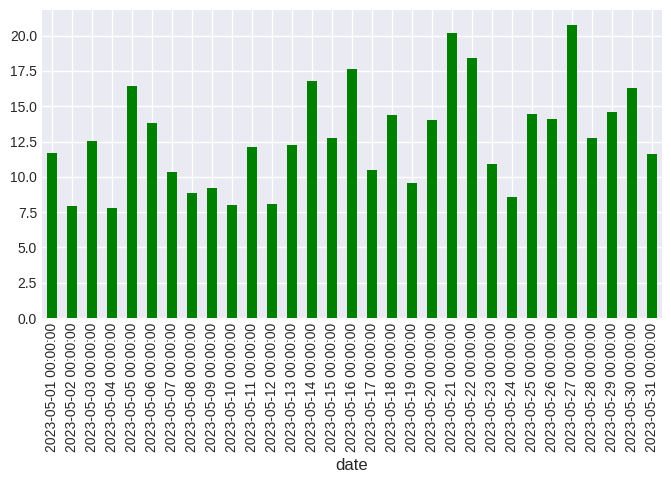

In [119]:
short_sdf['(-)αρνητικότητα | θετικότητα(+)'] = short_sdf.positive*100//short_sdf[['positive','negative']].sum(
        axis=1) - short_sdf.negative*100//short_sdf[['positive','negative']].sum(axis=1)

short_sdf['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean().plot(kind='bar',
                                                                               color=(short_sdf['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

In [120]:
short_sdf[(short_sdf['(-)αρνητικότητα | θετικότητα(+)'] == short_sdf['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (short_sdf['(-)αρνητικότητα | θετικότητα(+)'] == short_sdf['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][['index', 'positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

,index,positive,negative,(-)αρνητικότητα | θετικότητα(+)
date,,,,
2023-05-01,3,1.0,0.0,100.0
2023-05-01,12,3.0,0.0,100.0
2023-05-01,21,0.0,4.0,-100.0
2023-05-01,43,4.0,0.0,100.0
2023-05-02,57,3.0,0.0,100.0
...,...,...,...,...
2023-05-31,6794,0.0,2.0,-100.0
2023-05-31,6815,0.0,2.0,-100.0
2023-05-31,6827,0.0,1.0,-100.0
